## A.I. Assignment 5

## Learning Goals

By the end of this lab, you should be able to:
* Get more familiar with tensors in pytorch 
* Create a simple multilayer perceptron model with pytorch
* Visualise the parameters


### Task

Build a fully connected feed forward network that adds two bits. Determine the a propper achitecture for this network (what database you use for this problem? how many layers? how many neurons on each layer? what is the activation function? what is the loss function? etc)

Create at least 3 such networks and compare their performance (how accurate they are?, how farst they are trained to get at 1 accuracy?)

Display for the best one the weights for each layer.


In [1]:
import torch
import torch.nn as nn
from collections import OrderedDict


In [2]:
# your code here
model1 = nn.Sequential(OrderedDict([
   ('hidden', nn.Linear(2,2)),
   ('activation', nn.ReLU()),
   ('output', nn.Linear(2,2))
]))

In [4]:
print(model1)

Sequential(
  (hidden): Linear(in_features=2, out_features=2, bias=True)
  (activation): ReLU()
  (output): Linear(in_features=2, out_features=2, bias=True)
)


In [10]:
# your code here
data_in = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
print(data_in)

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])


In [11]:
# your code here
data_target = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 0]], dtype=torch.float32)
print(data_target)

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.]])


In [12]:
# your code here
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model1.parameters(), lr=0.1)

In [13]:
# your code here
# Train the model
for epoch in range(10000):
    y_pred = model1(data_in)

    loss = criterion(y_pred, data_target)
    print(f'Epoch {epoch + 1}/1000 | Loss: {loss.item()}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if loss.item() < 1e-3:
        break

Epoch 1/1000 | Loss: 0.46211007237434387
Epoch 2/1000 | Loss: 0.2772257924079895
Epoch 3/1000 | Loss: 0.16332632303237915
Epoch 4/1000 | Loss: 0.17584238946437836
Epoch 5/1000 | Loss: 0.21073418855667114
Epoch 6/1000 | Loss: 0.19467182457447052
Epoch 7/1000 | Loss: 0.1543758064508438
Epoch 8/1000 | Loss: 0.12503337860107422
Epoch 9/1000 | Loss: 0.1130896508693695
Epoch 10/1000 | Loss: 0.10930363088846207
Epoch 11/1000 | Loss: 0.1055525541305542
Epoch 12/1000 | Loss: 0.09877030551433563
Epoch 13/1000 | Loss: 0.08994904160499573
Epoch 14/1000 | Loss: 0.08161737024784088
Epoch 15/1000 | Loss: 0.0742124617099762
Epoch 16/1000 | Loss: 0.06598133593797684
Epoch 17/1000 | Loss: 0.057105422019958496
Epoch 18/1000 | Loss: 0.049761395901441574
Epoch 19/1000 | Loss: 0.046223923563957214
Epoch 20/1000 | Loss: 0.0455164834856987
Epoch 21/1000 | Loss: 0.045584581792354584
Epoch 22/1000 | Loss: 0.04446513205766678
Epoch 23/1000 | Loss: 0.04133405536413193
Epoch 24/1000 | Loss: 0.03669222444295883
Epo

In [14]:
# your code here
# visualize the resuts
print(model1(data_in))

tensor([[ 8.2376e-03, -9.9248e-04],
        [-2.8940e-02,  9.9019e-01],
        [ 9.9458e-01, -5.4946e-03],
        [ 1.0033e+00, -1.4002e-02]], grad_fn=<AddmmBackward0>)


In [15]:
# your code here
# print model wights
print(model1.state_dict())

OrderedDict({'hidden.weight': tensor([[-1.0172, -1.2110],
        [ 1.7910,  0.0130]]), 'hidden.bias': tensor([ 0.7422, -0.2701]), 'output.weight': tensor([[ 0.0501,  0.6730],
        [-1.3354, -0.6547]]), 'output.bias': tensor([-0.0289,  0.9902])})


In [19]:
accuracy = 0
for i in range(len(data_target)):
    difference = (model1(data_in)[i] - data_target[i]).abs()
    if torch.all(difference < 0.05):
        accuracy += 1

# print it as a percentage
print(f'Accuracy: {accuracy/len(data_target) * 100}%')

Accuracy: 100.0%


In [97]:
# your code here
model2 = nn.Sequential(OrderedDict([
        ('hidden1', nn.Linear(2, 3)),
        ('activation1', nn.ReLU()),
        ('hidden2', nn.Linear(3,3)),
        ('activation2', nn.LeakyReLU()),
        ('output', nn.Linear(3, 2)),
        ('activation3', nn.Tanh())
    ]))

In [98]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model2.parameters(), lr=0.001)  # Stochastic gradient descent optimizer

Epoch 1/1000 | Loss: 0.4247298240661621
Epoch 2/1000 | Loss: 0.42420804500579834
Epoch 3/1000 | Loss: 0.42368701100349426
Epoch 4/1000 | Loss: 0.4231666922569275
Epoch 5/1000 | Loss: 0.4226471185684204
Epoch 6/1000 | Loss: 0.422128289937973
Epoch 7/1000 | Loss: 0.42161014676094055
Epoch 8/1000 | Loss: 0.42109277844429016
Epoch 9/1000 | Loss: 0.4205760657787323
Epoch 10/1000 | Loss: 0.4200601577758789
Epoch 11/1000 | Loss: 0.4195450246334076
Epoch 12/1000 | Loss: 0.4190305769443512
Epoch 13/1000 | Loss: 0.41851693391799927
Epoch 14/1000 | Loss: 0.4180039167404175
Epoch 15/1000 | Loss: 0.41749173402786255
Epoch 16/1000 | Loss: 0.4169802665710449
Epoch 17/1000 | Loss: 0.4164695143699646
Epoch 18/1000 | Loss: 0.41595953702926636
Epoch 19/1000 | Loss: 0.4154503345489502
Epoch 20/1000 | Loss: 0.41494184732437134
Epoch 21/1000 | Loss: 0.41443419456481934
Epoch 22/1000 | Loss: 0.4139271676540375
Epoch 23/1000 | Loss: 0.4134209454059601
Epoch 24/1000 | Loss: 0.41291558742523193
Epoch 25/1000 | 

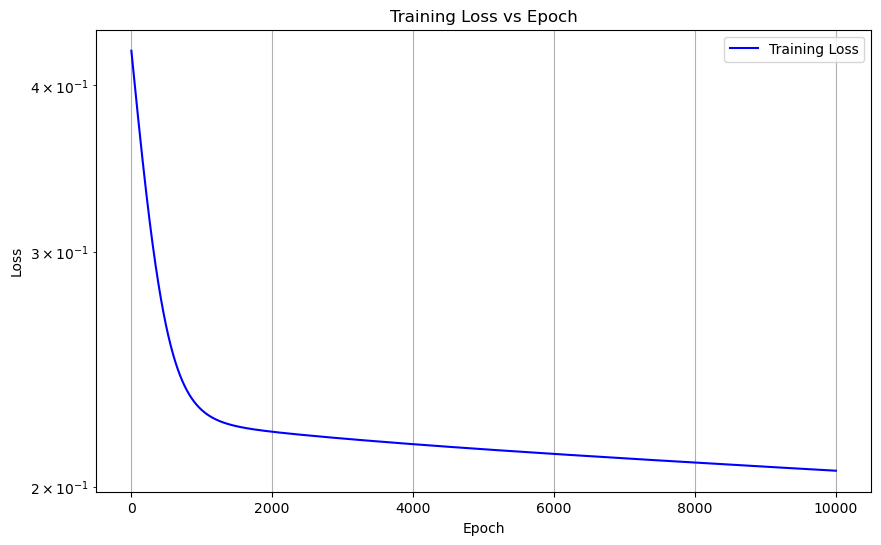

In [99]:
import matplotlib.pyplot as plt

losses = []

for epoch in range(10000):
    y_pred = model2(data_in)

    loss = criterion(y_pred, data_target)
    print(f'Epoch {epoch + 1}/1000 | Loss: {loss.item()}')
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if loss.item() < 1e-3:
        break

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(losses) + 1), losses, 'b-', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs Epoch')
plt.grid(True)
plt.legend()
plt.yscale('log')  # Using log scale since loss typically decreases exponentially
plt.show()

In [45]:
accuracy = 0
for i in range(len(data_target)):
    difference = (model1(data_in)[i] - data_target[i]).abs()
    if torch.all(difference < 0.05):
        accuracy += 1

# print it as a percentage
print(f'Accuracy: {accuracy/len(data_target) * 100}%')

Accuracy: 100.0%


In [88]:
# your code here
model3 = nn.Sequential(OrderedDict([
        ('hidden1', nn.Linear(2, 3)),
        ('activation1', nn.Sigmoid()),
        ('hidden2', nn.Linear(3,100)),
        ('activation2', nn.LeakyReLU()),
        ('output', nn.Linear(100, 2)),
        ('activation3', nn.Sigmoid())
    ]))

In [89]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model3.parameters(), lr=0.001)

Epoch 1/1000 | Loss: 0.7234188914299011
Epoch 2/1000 | Loss: 0.7195895910263062
Epoch 3/1000 | Loss: 0.7158404588699341
Epoch 4/1000 | Loss: 0.7121713757514954
Epoch 5/1000 | Loss: 0.7085851430892944
Epoch 6/1000 | Loss: 0.7050818204879761
Epoch 7/1000 | Loss: 0.7016616463661194
Epoch 8/1000 | Loss: 0.698327362537384
Epoch 9/1000 | Loss: 0.695106565952301
Epoch 10/1000 | Loss: 0.6919727921485901
Epoch 11/1000 | Loss: 0.6889224052429199
Epoch 12/1000 | Loss: 0.6859546899795532
Epoch 13/1000 | Loss: 0.6830690503120422
Epoch 14/1000 | Loss: 0.6802650690078735
Epoch 15/1000 | Loss: 0.677541971206665
Epoch 16/1000 | Loss: 0.6748988628387451
Epoch 17/1000 | Loss: 0.6723348498344421
Epoch 18/1000 | Loss: 0.6698548197746277
Epoch 19/1000 | Loss: 0.6674518585205078
Epoch 20/1000 | Loss: 0.6651245951652527
Epoch 21/1000 | Loss: 0.662871778011322
Epoch 22/1000 | Loss: 0.660692036151886
Epoch 23/1000 | Loss: 0.6585938930511475
Epoch 24/1000 | Loss: 0.656569242477417
Epoch 25/1000 | Loss: 0.6546118

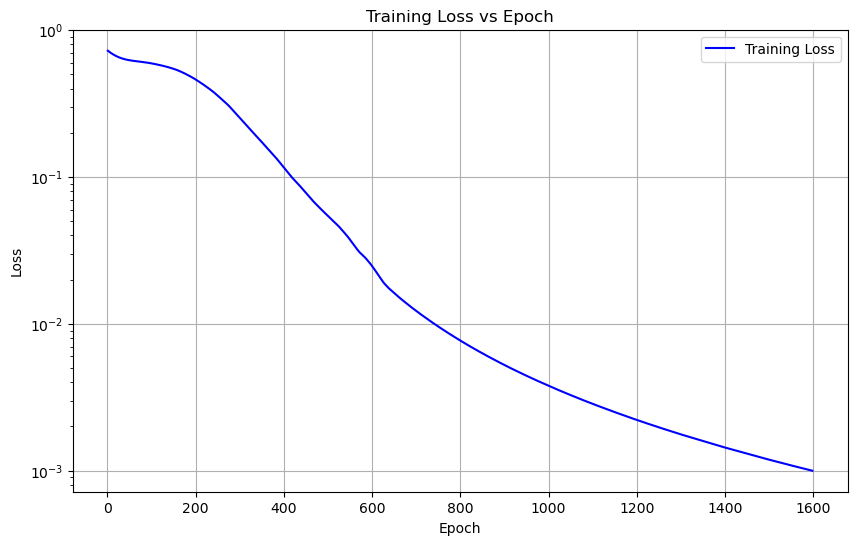

In [ ]:
import matplotlib.pyplot as plt

losses = []
for epoch in range(3000):
    y_pred = model3(data_in)

    loss = criterion(y_pred, data_target)
    print(f'Epoch {epoch + 1}/3000 | Loss: {loss.item()}')
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if loss.item() < 1e-3:
        break


plt.figure(figsize=(10, 6))
plt.plot(range(1, len(losses) + 1), losses, 'b-', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs Epoch')
plt.grid(True)
plt.legend()
plt.yscale('log')  # Using log scale since loss typically decreases exponentially
plt.show()

Model 1 converged at epoch 972


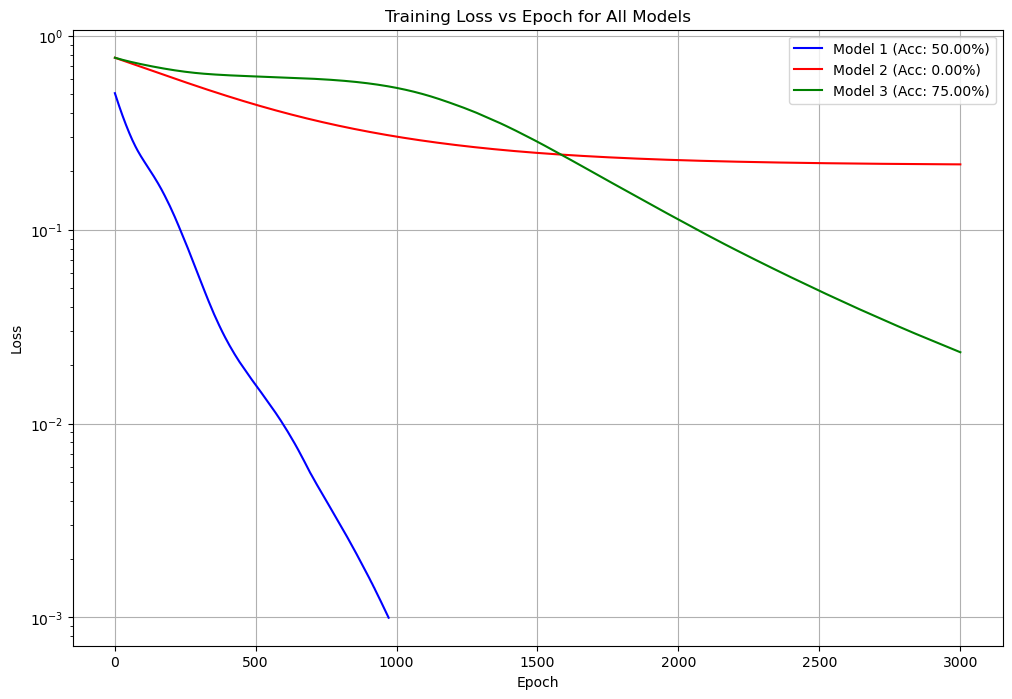


Model 1 Accuracy: 50.00% - Epochs: 972
Model 2 Accuracy: 0.00% - Epochs: 3000
Model 3 Accuracy: 75.00% - Epochs: 3000

Best Model: Model 3 with Accuracy: 75.00%
Weights:
hidden1.weight: tensor([[ 1.7592, -1.1949],
        [-1.4136,  1.5892],
        [-1.3543, -1.5966],
        [ 0.9834, -1.6721],
        [ 1.3510, -0.2580],
        [-1.3995, -0.6805]])
hidden1.bias: tensor([ 0.0366, -0.3791,  0.7009,  0.7068, -0.2254,  1.0061])
hidden2.weight: tensor([[ 1.4166, -1.1734,  0.4891,  1.2364,  0.7948, -0.1285],
        [ 1.5748, -1.0924, -1.2673,  1.4842,  1.6262, -0.9005],
        [-1.4022,  1.4215,  0.7797, -0.4916, -0.3841,  1.2848],
        [ 0.7572, -1.1510, -1.8124, -0.9400,  0.2978, -1.5655],
        [-0.2865,  0.2372, -0.4461,  0.2401, -0.3112, -0.3167],
        [ 1.3614, -0.8161,  1.0354,  0.8149,  0.3322,  0.9987],
        [-0.1985,  0.9256, -1.0503, -1.4814, -0.1858, -1.2383],
        [ 0.6943,  0.5886, -1.3241, -0.0515,  0.9012, -0.5610]])
hidden2.bias: tensor([-0.1459,  0.3258

In [121]:
import torch
import torch.nn as nn
from collections import OrderedDict
import matplotlib.pyplot as plt

data_in = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
data_target = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 0]], dtype=torch.float32)

model1 = nn.Sequential(OrderedDict([
    ('hidden', nn.Linear(2, 13)),
    ('activation', nn.ReLU()),
    ('output', nn.Linear(13, 2))
]))
optimizer1 = torch.optim.Adam(model1.parameters(), lr=0.001)
criterion1 = nn.MSELoss()
losses1 = []

model2 = nn.Sequential(OrderedDict([
    ('hidden1', nn.Linear(2, 3)),
    ('activation1', nn.Sigmoid()),
    ('hidden2', nn.Linear(3, 8)),
    ('activation2', nn.LeakyReLU()),
    ('hidden3', nn.Linear(8, 3)),
    ('activation3', nn.Tanh()),
    ('output', nn.Linear(3, 2)),
    ('activation4', nn.Tanh())
]))
optimizer2 = torch.optim.SGD(model2.parameters(), lr=0.0005)
criterion2 = nn.MSELoss()
losses2 = []

model3 = nn.Sequential(OrderedDict([
    ('hidden1', nn.Linear(2, 6)),
    ('activation1', nn.Sigmoid()),
    ('hidden2', nn.Linear(6, 8)),
    ('activation2', nn.LeakyReLU()),
    ('output', nn.Linear(8, 2)),
    ('activation3', nn.Sigmoid())
]))
optimizer3 = torch.optim.Adam(model3.parameters(), lr=0.0005)
criterion3 = nn.BCELoss()
losses3 = []

# Training all models
max_epochs = 3000

# Train Model 1
for epoch in range(max_epochs):
    y_pred = model1(data_in)
    loss = criterion1(y_pred, data_target)
    losses1.append(loss.item())
    optimizer1.zero_grad()
    loss.backward()
    optimizer1.step()
    if loss.item() < 1e-3:
        print(f'Model 1 converged at epoch {epoch + 1}')
        break

# Train Model 2
for epoch in range(max_epochs):
    y_pred = model2(data_in)
    loss = criterion2(y_pred, data_target)
    losses2.append(loss.item())
    optimizer2.zero_grad()
    loss.backward()
    optimizer2.step()
    if loss.item() < 1e-3:
        print(f'Model 2 converged at epoch {epoch + 1}')
        break

# Train Model 3
for epoch in range(max_epochs):
    y_pred = model3(data_in)
    loss = criterion3(y_pred, data_target)
    losses3.append(loss.item())
    optimizer3.zero_grad()
    loss.backward()
    optimizer3.step()
    if loss.item() < 1e-3:
        print(f'Model 3 converged at epoch {epoch + 1}')
        break

# Calculate accuracies
def calculate_accuracy(model, data_in, data_target, threshold=0.05):
    accuracy = 0
    with torch.no_grad():
        predictions = model(data_in)
        for i in range(len(data_target)):
            difference = (predictions[i] - data_target[i]).abs()
            if torch.all(difference < threshold):
                accuracy += 1
    return accuracy / len(data_target) * 100

acc1 = calculate_accuracy(model1, data_in, data_target)
acc2 = calculate_accuracy(model2, data_in, data_target)
acc3 = calculate_accuracy(model3, data_in, data_target)


plt.figure(figsize=(12, 8))
plt.plot(range(1, len(losses1) + 1), losses1, 'b-', label=f'Model 1 (Acc: {acc1:.2f}%)')
plt.plot(range(1, len(losses2) + 1), losses2, 'r-', label=f'Model 2 (Acc: {acc2:.2f}%)')
plt.plot(range(1, len(losses3) + 1), losses3, 'g-', label=f'Model 3 (Acc: {acc3:.2f}%)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs Epoch for All Models')
plt.grid(True)
plt.legend()
plt.yscale('log')
plt.show()


print(f"\nModel 1 Accuracy: {acc1:.2f}% - Epochs: {len(losses1)}")
print(f"Model 2 Accuracy: {acc2:.2f}% - Epochs: {len(losses2)}")
print(f"Model 3 Accuracy: {acc3:.2f}% - Epochs: {len(losses3)}")


best_model = max([(acc1, model1, "Model 1"), (acc2, model2, "Model 2"), (acc3, model3, "Model 3")], 
                key=lambda x: x[0])
print(f"\nBest Model: {best_model[2]} with Accuracy: {best_model[0]:.2f}%")
print("Weights:")
for name, param in best_model[1].state_dict().items():
    print(f"{name}: {param}")